In [1]:
import numpy as np
import librosa
import matplotlib.pyplot as plt

In [2]:
# загрузка файла
def load_audio(filename):
    audio_data, sample_rate = librosa.load(filename)
    return audio_data, sample_rate

In [3]:
# вычисление спектрограммы
def compute_spectrogram(audio_data, sample_rate):
    n_fft = 2048
    hop_length = 512
    window = np.hanning(n_fft)
    stft = librosa.stft(audio_data, n_fft=n_fft, hop_length=hop_length, window=window)
    spectrogram = np.abs(stft)
    log_spectrogram = librosa.amplitude_to_db(spectrogram, ref=np.max)
    return log_spectrogram, sample_rate, n_fft

In [4]:
# визуализация спектограмы
def plot_spectrogram(log_spectrogram, sample_rate, filename, name):
    plt.figure(figsize=(12, 6))
    librosa.display.specshow(log_spectrogram, sr=sample_rate, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f'Исходная спектрограмма для {name}')
    plt.savefig(f'spectrogram_{filename[:-4]}.png', bbox_inches='tight')
    plt.show()


In [5]:
# мин и макс частоты голоса
def find_voice_range(log_spectrogram, sample_rate, n_fft):
    min_freq = np.min(np.where(log_spectrogram > -60)[0])
    max_freq = np.max(np.where(log_spectrogram > -60)[0])
    print(f"Минимальная частота голоса: {min_freq * sample_rate / n_fft} Гц")
    print(f"Максимальная частота голоса: {max_freq * sample_rate / n_fft} Гц")


In [6]:
# основной тон
def find_fundamental_frequency(log_spectrogram, sample_rate, n_fft):
    harmonic_product_spectrum = np.prod(log_spectrogram, axis=1)
    fundamental_freq = np.argmax(harmonic_product_spectrum) * sample_rate / n_fft
    print(f"Основной тон: {fundamental_freq} Гц")
    return fundamental_freq

In [7]:
# нахождение трех самых сильных формант
def find_formants(log_spectrogram, sample_rate, n_fft):
    time_step = int(0.1 * sample_rate / 512)
    time_slices = range(0, log_spectrogram.shape[1], time_step)
    formants = []
    for i in range(len(time_slices) - 1):
        start = time_slices[i]
        end = time_slices[i + 1]
        segment = log_spectrogram[:, start:end]

        freq_bins = np.arange(segment.shape[0]) * sample_rate / n_fft  # частоты
        peaks = np.argsort(np.max(segment, axis=1))[-3:]               # индексы трех максимальных пиков

        formants.append([freq_bins[peak] for peak in peaks])

    print("Три самые сильные форманты:")
    for i, formant in enumerate(formants):
        print(f"Временной сегмент {i}: {[f'{freq:.0f} Гц' for freq in formant]}")

    return formants

In [8]:
def save_results(filename, min_freq, max_freq, fundamental_freq, formants, sample_rate, n_fft):
    with open(f"{filename[:-4]}_results.txt", "w", encoding="utf-8") as f:
        f.write(f"Результаты анализа звукового файла: {filename}\n\n")
        f.write(f"Минимальная частота голоса: {min_freq * sample_rate / n_fft} Гц\n")
        f.write(f"Максимальная частота голоса: {max_freq * sample_rate / n_fft} Гц\n\n")
        f.write(f"Основной тон: {fundamental_freq} Гц\n\n")
        f.write("Три самые сильные форманты:\n")
        for j, formant in enumerate(formants):
            f.write(f"Временной сегмент {j}: {[f'{freq:.0f} Гц' for freq in formant]}\n")


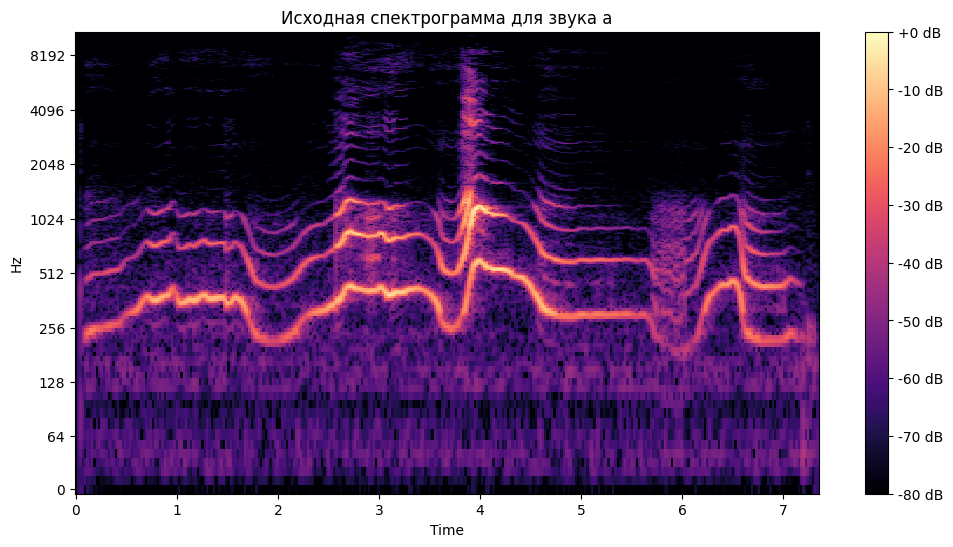

Минимальная частота голоса: 10.7666015625 Гц
Максимальная частота голоса: 8860.9130859375 Гц
Основной тон: 1184.326171875 Гц
Три самые сильные форманты:
Временной сегмент 0: ['226 Гц', '215 Гц', '237 Гц']
Временной сегмент 1: ['258 Гц', '237 Гц', '248 Гц']
Временной сегмент 2: ['237 Гц', '258 Гц', '248 Гц']
Временной сегмент 3: ['528 Гц', '269 Гц', '258 Гц']
Временной сегмент 4: ['258 Гц', '528 Гц', '269 Гц']
Временной сегмент 5: ['291 Гц', '301 Гц', '312 Гц']
Временной сегмент 6: ['312 Гц', '334 Гц', '323 Гц']
Временной сегмент 7: ['388 Гц', '366 Гц', '377 Гц']
Временной сегмент 8: ['377 Гц', '355 Гц', '366 Гц']
Временной сегмент 9: ['388 Гц', '366 Гц', '377 Гц']
Временной сегмент 10: ['409 Гц', '388 Гц', '398 Гц']
Временной сегмент 11: ['366 Гц', '345 Гц', '355 Гц']
Временной сегмент 12: ['377 Гц', '355 Гц', '366 Гц']
Временной сегмент 13: ['377 Гц', '388 Гц', '366 Гц']
Временной сегмент 14: ['388 Гц', '377 Гц', '366 Гц']
Временной сегмент 15: ['388 Гц', '366 Гц', '377 Гц']
Временной

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


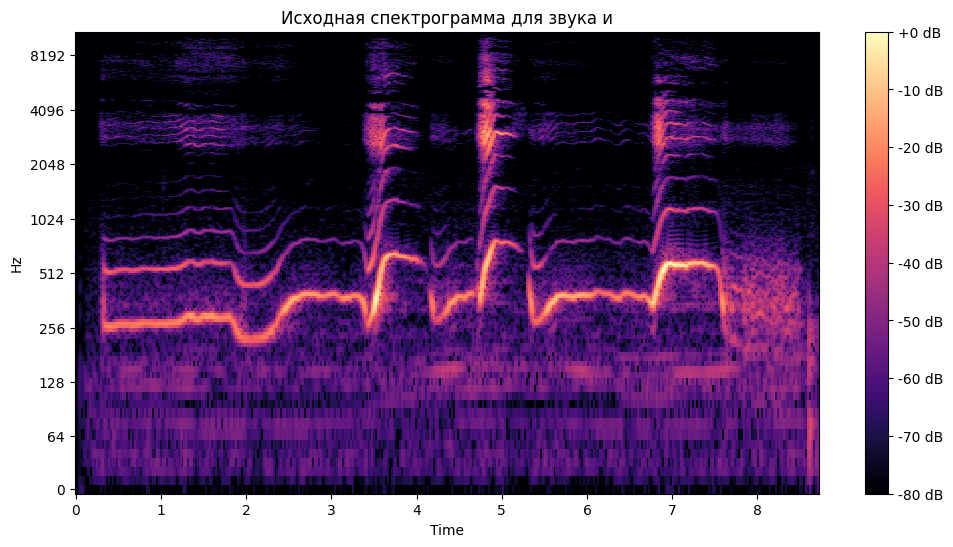

Минимальная частота голоса: 0.0 Гц
Максимальная частота голоса: 10120.60546875 Гц
Основной тон: 527.5634765625 Гц
Три самые сильные форманты:
Временной сегмент 0: ['118 Гц', '129 Гц', '140 Гц']
Временной сегмент 1: ['86 Гц', '129 Гц', '118 Гц']
Временной сегмент 2: ['129 Гц', '43 Гц', '118 Гц']
Временной сегмент 3: ['528 Гц', '269 Гц', '258 Гц']
Временной сегмент 4: ['517 Гц', '269 Гц', '258 Гц']
Временной сегмент 5: ['528 Гц', '269 Гц', '258 Гц']
Временной сегмент 6: ['528 Гц', '258 Гц', '269 Гц']
Временной сегмент 7: ['528 Гц', '258 Гц', '269 Гц']
Временной сегмент 8: ['280 Гц', '258 Гц', '269 Гц']
Временной сегмент 9: ['280 Гц', '258 Гц', '269 Гц']
Временной сегмент 10: ['538 Гц', '258 Гц', '269 Гц']
Временной сегмент 11: ['258 Гц', '280 Гц', '269 Гц']
Временной сегмент 12: ['549 Гц', '280 Гц', '269 Гц']
Временной сегмент 13: ['269 Гц', '291 Гц', '280 Гц']
Временной сегмент 14: ['280 Гц', '301 Гц', '291 Гц']
Временной сегмент 15: ['301 Гц', '280 Гц', '291 Гц']
Временной сегмент 16: 

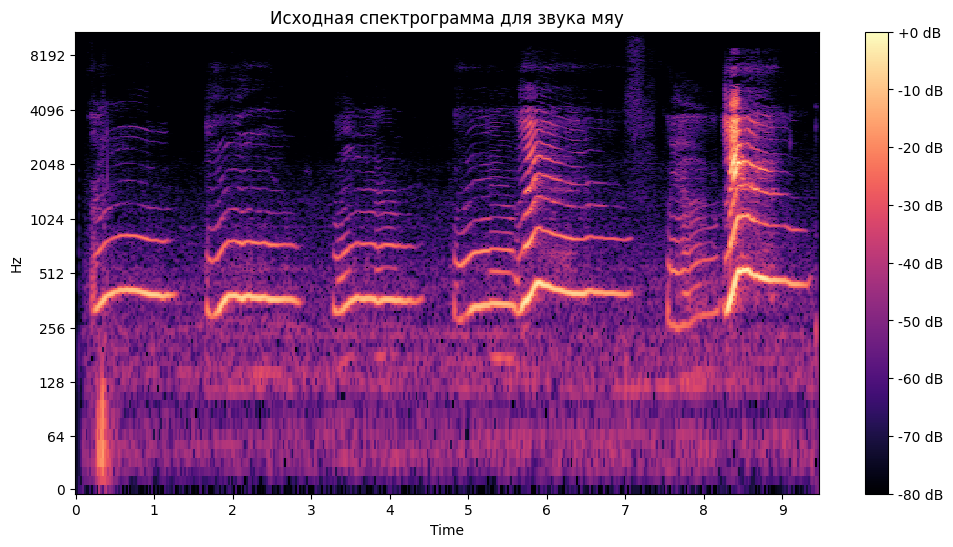

Минимальная частота голоса: 0.0 Гц
Максимальная частота голоса: 10314.404296875 Гц
Основной тон: 2088.720703125 Гц
Три самые сильные форманты:
Временной сегмент 0: ['194 Гц', '54 Гц', '237 Гц']
Временной сегмент 1: ['43 Гц', '140 Гц', '32 Гц']
Временной сегмент 2: ['312 Гц', '334 Гц', '323 Гц']
Временной сегмент 3: ['345 Гц', '366 Гц', '355 Гц']
Временной сегмент 4: ['366 Гц', '388 Гц', '377 Гц']
Временной сегмент 5: ['388 Гц', '409 Гц', '398 Гц']
Временной сегмент 6: ['398 Гц', '420 Гц', '409 Гц']
Временной сегмент 7: ['431 Гц', '420 Гц', '409 Гц']
Временной сегмент 8: ['398 Гц', '420 Гц', '409 Гц']
Временной сегмент 9: ['388 Гц', '409 Гц', '398 Гц']
Временной сегмент 10: ['377 Гц', '398 Гц', '388 Гц']
Временной сегмент 11: ['377 Гц', '398 Гц', '388 Гц']
Временной сегмент 12: ['398 Гц', '388 Гц', '377 Гц']
Временной сегмент 13: ['398 Гц', '377 Гц', '388 Гц']
Временной сегмент 14: ['151 Гц', '398 Гц', '388 Гц']
Временной сегмент 15: ['248 Гц', '140 Гц', '151 Гц']
Временной сегмент 16: 

In [9]:
def main():
    name_filename = ["a.wav", "i.wav", "meow.wav"]
    name_filename_1 = ["звука а", "звука и", "звука мяу"]

    for i in range(len(name_filename)):
        filename = name_filename[i]
        name = name_filename_1[i]

        audio_data, sample_rate = load_audio(filename)

        log_spectrogram, sample_rate, n_fft = compute_spectrogram(audio_data, sample_rate)

        plot_spectrogram(log_spectrogram, sample_rate, filename, name)

        find_voice_range(log_spectrogram, sample_rate, n_fft)

        fundamental_freq = find_fundamental_frequency(log_spectrogram, sample_rate, n_fft)

        formants = find_formants(log_spectrogram, sample_rate, n_fft)

        min_freq = np.min(np.where(log_spectrogram > -60)[0])
        max_freq = np.max(np.where(log_spectrogram > -60)[0])

        save_results(filename, min_freq, max_freq, fundamental_freq, formants, sample_rate, n_fft)


if __name__ == "__main__":
    main()